In [1]:
# ============================ IMPORTS ====================================== #
import matplotlib.pyplot as plt
# TuMAG Libs
import utils as ut
import numpy as np
import movie_tools as mt
# =========================================================================== #

from matplotlib import pyplot as plt

In [73]:
def Read_flat():
# Example of execution 

    Image_path = '/Volumes/New Volume/TuMAG/Sun_obs/step8/'
    import glob, os
    os.chdir(Image_path)
    files = sorted(glob.glob("*.img"))
    print(len(files))
    Mg = 0
    Fe = 0
    # files = files[0:(10 + 8) * 2 * 2]
    n_ciclos = len(files)/((10 + 8) * 2) ME FALTAN LAS 4 MODULACIONES CARA HUEVO
    FlatMg = np.zeros((2048,2048,10,2))
    FlatFe = np.zeros((2048,2048,8,2))
    for f in files:
        H, I = ut.Read_Image(Image_path+f)#,PlotFlag=True)#,vmin=120,vmax=140)

        if H['ObservationMode'] == 2: #Obs1 10 waves magnesio
            #Mg case
            FlatMg[:,:,Mg,H['CameraID']] += I
            Mg += 1
            if Mg > 9:
                Mg = 0
        if H['ObservationMode'] == 4:  #Obs2 8 waves hierro
            #Fe case
            FlatFe[:,:,Fe,H['CameraID']] += I
            Fe += 1
            if Fe > 7:
                Fe = 0
        print(H['ObservationMode'],H['CameraID'],Fe,Mg)
    FlatFe = FlatFe / n_ciclos
    FlatMg = FlatMg / n_ciclos
    # FlatFe /= np.mean(FlatFe[1024-100:1024+100,1024-100:1024+100],axis=(0,1)) 
    # FlatMg /= np.mean(FlatMg[1024-100:1024+100,1024-100:1024+100],axis=(0,1)) 

    return FlatMg, FlatFe


In [ ]:
FlatMg, FlatFe = Read_flat()
# dummy = np.load('FlatMg.npz')
# FlatMg = dummy['FlatMg']
# dummy = np.load('FlatFe.npz')
# FlatFe = dummy['FlatFe']

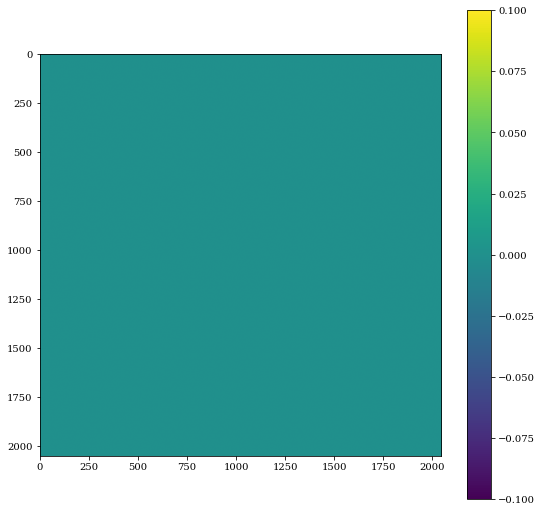

In [91]:
plt.imshow(FlatMg[:,:,2,1])
plt.colorbar()

In [ ]:
np.savez('FlatMg',FlatMg=FlatMg)
np.savez('FlatFe',FlatFe=FlatFe)

In [32]:
def Read_grid_data():
# Example of execution 

    Image_path = '/Volumes/New Volume/TuMAG/Sun_obs/step6/'
    import glob, os
    os.chdir(Image_path)
    files = glob.glob("*.img")
    print(len(files))
    Mg = 0
    Fe = -1
    index = 0
    files = files[0:(10 + 8) * 10]
    n_ciclos = int(len(files)/(10 + 8))
    ImMg = np.zeros((2048,2048,10,n_ciclos))
    ImFe = np.zeros((2048,2048,10,n_ciclos))
    for f in files:
        # print(f,len(f),Mg,Fe,index)
        H, I = ut.Read_Image(Image_path+f)#,PlotFlag=True)#,vmin=120,vmax=140)
        if Mg >= 0:
            #Mg case
            ImMg[:,:,Mg,index//(10+8)] += I
            Mg += 1
            if Mg > 9:
                Mg = -1
                Fe = 0
        elif Fe >= 0:
            #Mg case
            ImFe[:,:,Fe,index//(10+8)] += I
            Fe += 1
            if Fe > 7:
                Mg = 0
                Fe = -1
        else:
            pass
        index += 1
        # print(index//(10+8))
    return ImMg,ImFe


In [33]:
ImMg,ImFe = Read_grid_data()


1610


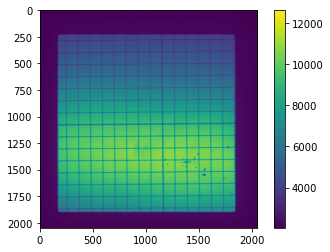

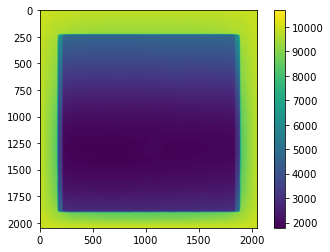

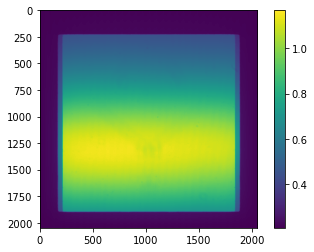

In [43]:
plt.imshow(ImMg[:,:,1,0],vmax=12600)
plt.colorbar()
plt.show()
plt.imshow(ImMg[:,:,0,5]/FlatMg[:,:,0])#,vmax=2600)
plt.colorbar()
plt.show()
plt.imshow(FlatMg[:,:,0])#,vmax=2600)
plt.colorbar()
plt.show()


In [29]:
for i in range(10):
    for j in range(8):
        ImFe[:,:,j,i] /= FlatFe[:,:,j]
    for j in range(10):
        ImMg[:,:,j,i] /= FlatMg[:,:,j]

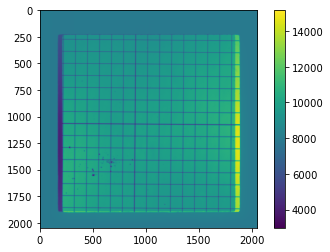

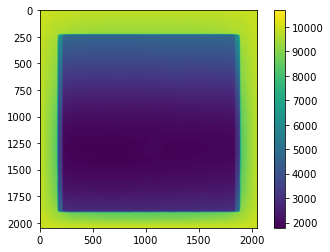

In [30]:
plt.imshow(ImFe[:,:,0,5])#,vmax=2600)
plt.colorbar()
plt.show()
plt.imshow(ImMg[:,:,0,5])#,vmax=2600)
plt.colorbar()
plt.show()


In [44]:
ImMg = ImMg / np.mean(ImMg[1024-100:1024+100,1024-100:1024+100,1,1])
ImFe = ImFe / np.mean(ImFe[1024-100:1024+100,1024-100:1024+100,1,1])
mt.make_movie(ImMg[:,:,0,:],'imMg.mp4',figsize=[9,9],fps=8,cbar=True,cmap='Greys',vmin=0.8,vmax=1.2,title='minMg')
mt.make_movie(ImFe[:,:,0,:],'imFe.mp4',figsize=[9,9],fps=8,cbar=True,cmap='Greys',vmin=0.8,vmax=1.2,title='maxFe')
print('hola')


hola
